Hackathon: HACK THAT STARTUP  
Authon: Johnny Núñez Cano

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cd /content/drive/MyDrive/Hackathon

 # Challenge 1:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
import tensorflow as tf

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Hackathon/Marketing.csv', encoding = 'unicode_escape')

In [ ]:
data

,TV,Radio,Periodico,Redes Sociales,Email,Ingresos
0,230.1,37.8,69.2,151.81,25.85,22.1
1,44.5,39.3,45.1,47.49,55.98,10.4
2,17.2,45.9,69.3,35.76,133.43,9.3
3,151.5,41.3,58.5,109.25,33.17,18.5
4,180.8,10.8,58.4,108.57,8.71,12.9
...,...,...,...,...,...,...
195,38.2,3.7,13.8,23.74,3.23,7.6
196,94.2,4.9,8.1,56.16,1.06,9.7
197,177.0,9.3,6.4,105.57,0.85,12.8
198,283.6,42.0,66.2,184.51,22.60,25.5


Previsualización de los datos

In [ ]:
data.describe()

,TV,Radio,Periodico,Redes Sociales,Email,Ingresos
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,96.506750,17.259350,14.022500
std,85.854236,14.846809,21.778621,49.824942,26.584668,5.217457
min,0.700000,0.000000,0.300000,6.060000,0.000000,1.600000
25%,74.375000,9.975000,12.750000,51.357500,2.522500,10.375000
50%,149.750000,22.900000,25.750000,99.480000,8.160000,12.900000
75%,218.825000,36.525000,45.100000,137.872500,20.055000,17.400000
max,296.400000,49.600000,114.000000,188.530000,170.650000,27.000000


In [ ]:
data.dtypes

TV                float64
Radio             float64
Periodico         float64
Redes Sociales    float64
Email             float64
Ingresos          float64
dtype: object

# Valores Unicos del Dataset

In [ ]:
data.nunique()

TV                190
Radio             167
Periodico         172
Redes Sociales    194
Email             189
Ingresos          121
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


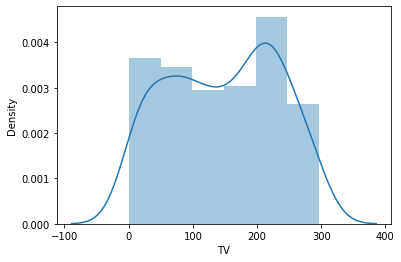

In [ ]:
sns.distplot(data["TV"])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


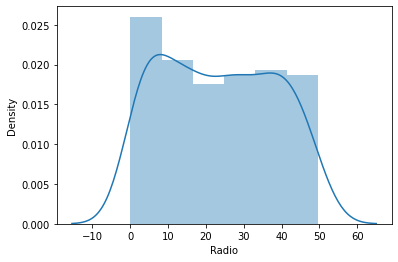

In [ ]:
sns.distplot(data["Radio"])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


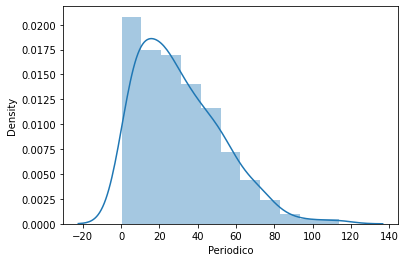

In [ ]:
sns.distplot(data["Periodico"])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


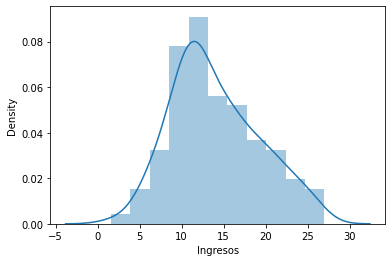

In [ ]:
sns.distplot(data["Ingresos"])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


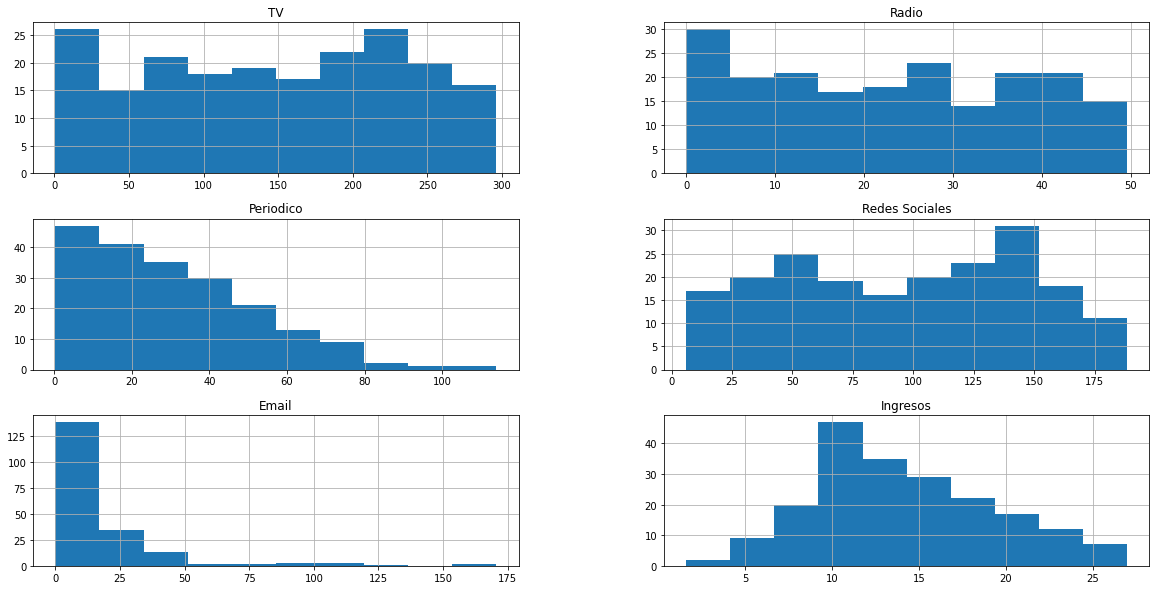

In [ ]:
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

In [ ]:
data.corr()

,TV,Radio,Periodico,Redes Sociales,Email,Ingresos
TV,1.000000,0.054809,0.056648,0.985685,-0.414541,0.782224
Radio,0.054809,1.000000,0.354104,0.222370,0.471470,0.576223
Periodico,0.056648,0.354104,1.000000,0.115111,0.615725,0.228299
Redes Sociales,0.985685,0.222370,0.115111,1.000000,-0.325158,0.861085
Email,-0.414541,0.471470,0.615725,-0.325158,1.000000,-0.161965
Ingresos,0.782224,0.576223,0.228299,0.861085,-0.161965,1.000000


In [ ]:
data = data.rename(columns={'Redes Sociales': 'RedesSociales'})

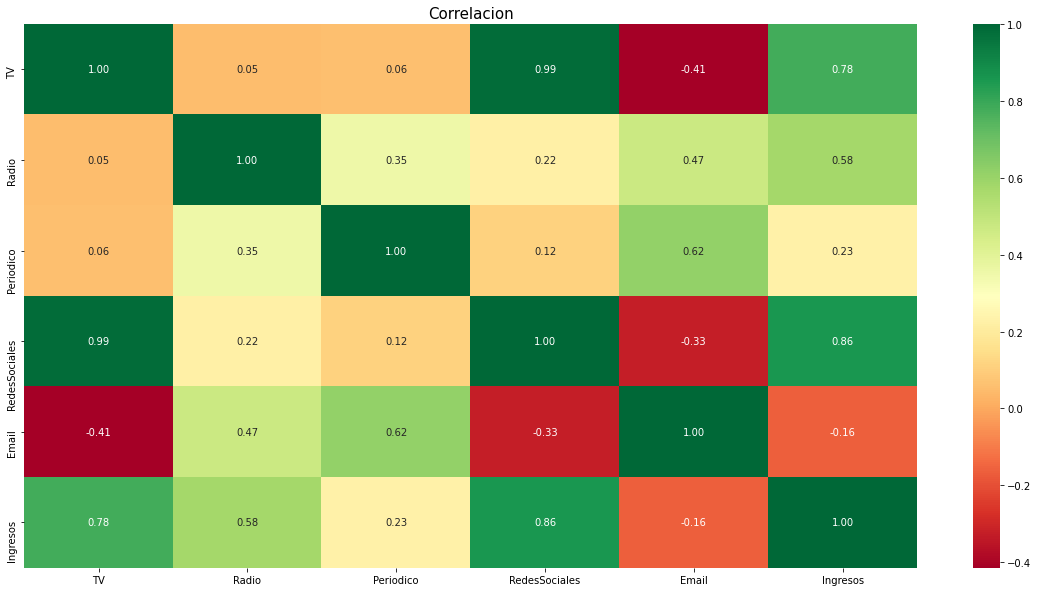

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Correlacion',fontsize=15)
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='RdYlGn')

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
feature_cols = ["TV", "Radio", "Periodico", "RedesSociales", "Email"]
X = data[feature_cols]
Y = data["Ingresos"]

In [ ]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

         feature           VIF
0             TV  1.308469e+09
1          Radio  3.436625e+07
2      Periodico  5.846740e+00
3  RedesSociales  1.658288e+09
4          Email  4.165240e+00


# Como podemos ver tanto en el plot de correlacion como en el resultado de vif, Periodico debe ir fuera del modelo e email prácticamente también. Podemos concluir que podemos aumentar el gasto en las TV, Redes Sociales y disminuir el gasto en en el Periodio e emails.
VIF = 1 : Las variables no están correlacionadas  
VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo  
VIF >5 : Las variables están altamente correlacionadas y deben desaparecer del modelo.  

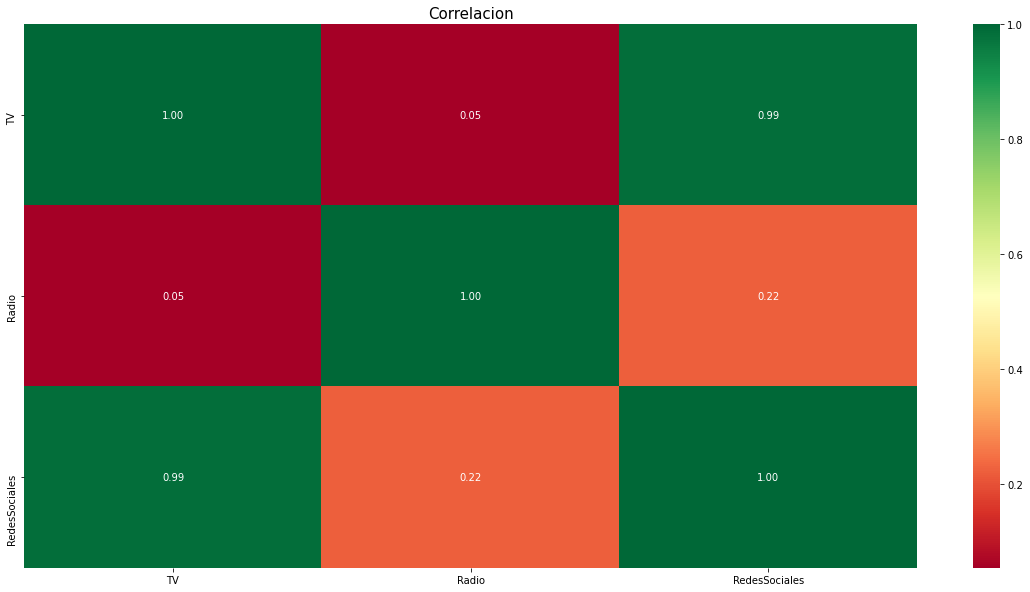

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Correlacion',fontsize=15)
sns.heatmap(data[["TV", "Radio","RedesSociales"]].corr(),annot=True,fmt='.2f',cmap='RdYlGn')

# Challenge 2:

In [ ]:
feature_cols = ["TV", "Radio", "Periodico", "RedesSociales", "Email"]
X = data[feature_cols]
Y = data["Ingresos"]

 # Hacemos un feature Selection recursive con RandomForestRegressor

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
import numpy as np

In [ ]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X,Y)

In [ ]:
selector.ranking_

array([3, 1, 2, 1, 1])

In [ ]:
X_pred = X[["Email", "Radio","RedesSociales"]]

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_pred, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.intercept_

3.4955115197041913

In [ ]:
lm.coef_

array([-0.03435002,  0.17742561,  0.07245315])

In [ ]:
lm.score(X_pred, Y)

0.9150597882249716

In [ ]:
feature_cols = ["RedesSociales", "Email"]
X = data[feature_cols]
Y = data["Ingresos"]

----- EVALUATION ON TRAIN SET ------
RMSE 2.565282415639336
R^2:  0.7570428956011818


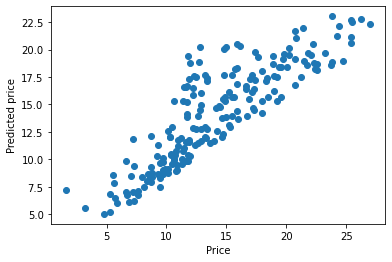

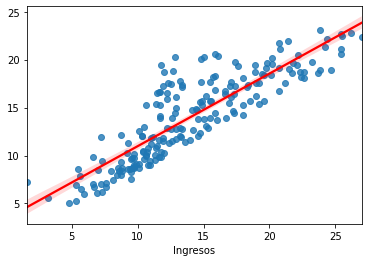

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

## fit the model
lm.fit(X, Y)

## predict training set
y_pred = lm.predict(X)

## Evaluate the model and plot it
from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(Y, y_pred)))
print("R^2: ",r2_score(Y, y_pred))

plt.scatter(Y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()
ax = sns.regplot(x=Y, y=y_pred,line_kws={"color": "red"} )


In [ ]:
redes_sociales = 500
email = 100
X_test = pd.DataFrame({
  "RedesSociales": [redes_sociales], 
  "Email" : [email],
})

## predict the test set and generate the submission file
y_pred = lm.predict(X_test)

In [ ]:
print("Ingresos: ", str(y_pred[0]))

Ingresos:  54.36140839209749


# Challenge 3:

In [ ]:
!pip install sentencepiece
!pip install tf-models-nightly
!pip install tf-nightly

     |████████████████████████████████| 1.2MB 15.4MB/s 
     |████████████████████████████████| 1.2MB 17.3MB/s 
     |████████████████████████████████| 71kB 11.9MB/s 
     |████████████████████████████████| 51kB 9.3MB/s 
     |████████████████████████████████| 401.1MB 43kB/s 
     |████████████████████████████████| 174kB 64.3MB/s 
     |████████████████████████████████| 645kB 52.8MB/s 
     |████████████████████████████████| 37.6MB 63kB/s 
     |████████████████████████████████| 102kB 14.4MB/s 
     |████████████████████████████████| 358kB 59.9MB/s 
     |████████████████████████████████| 3.4MB 55.2MB/s 
     |████████████████████████████████| 4.0MB 44.5MB/s 
     |████████████████████████████████| 12.2MB 42.9MB/s 
     |████████████████████████████████| 4.0MB 46.6MB/s 
     |████████████████████████████████| 471kB 57.0MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp36-none-any.whl size=16171 sha256=3cf05d5715bc52411a233a2be4710abd5ff052481e8498d2182c6859d1f8f4f1
  Stored i

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
import random
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_hub as hub

In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass
import tensorflow as tf

In [ ]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
import random

In [ ]:
def twenty_newsgroup_to_csv():
    newsgroups_train = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

    df = pd.DataFrame([newsgroups_train.data, newsgroups_train.target.tolist()]).T
    df.columns = ['text', 'target']

    targets = pd.DataFrame( newsgroups_train.target_names)
    targets.columns=['title']

    out = pd.merge(df, targets, left_on='target', right_index=True)
    out['date'] = pd.to_datetime('now')
    return out

data = twenty_newsgroup_to_csv()

In [ ]:
def clean_data(data):
    data = BeautifulSoup(data, "lxml").get_text()
    # Removing the @
    data = re.sub(r"@[A-Za-z0-9]+", ' ', data)
    # Removing the URL links
    data = re.sub(r"https?://[A-Za-z0-9./]+", ' ', data)
    # Keeping only letters
    data = re.sub(r"[^a-zA-Z.!?']", ' ', data)
    # Removing additional whitespaces
    data = re.sub(r" +", ' ', data)
    return data

In [ ]:
data.head(20)

,text,target,title,date
0,I was wondering if anyone out there could enli...,7,rec.autos,2021-01-23 15:51:14.626323
17,I recently posted an article asking what kind ...,7,rec.autos,2021-01-23 15:51:14.626323
29,\nIt depends on your priorities. A lot of peo...,7,rec.autos,2021-01-23 15:51:14.626323
56,an excellent automatic can be found in the sub...,7,rec.autos,2021-01-23 15:51:14.626323
64,: Ford and his automobile. I need information...,7,rec.autos,2021-01-23 15:51:14.626323
71,\nYo! Watch the attributions--I didn't say tha...,7,rec.autos,2021-01-23 15:51:14.626323
73,\nYou can avoid these problems entirely by ins...,7,rec.autos,2021-01-23 15:51:14.626323
77,"I have a 1986 Acura Integra 5 speed with 95,00...",7,rec.autos,2021-01-23 15:51:14.626323
84,"\nassuming yours is a non turbo MR2, the gruff...",7,rec.autos,2021-01-23 15:51:14.626323
156,"\n\nIn addition to restricted mileage, many cl...",7,rec.autos,2021-01-23 15:51:14.626323


In [ ]:
data_clean = [clean_data(text) for text in data.text]

In [ ]:
from official.nlp.bert.tokenization import FullTokenizer
from official.nlp import optimization

FullTokenizer = FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case)

In [ ]:
def encode_sentence(sent):
    return ["[CLS]"] + tokenizer.tokenize(sent) + ["[SEP]"]

In [ ]:
data_inputs = [encode_sentence(sentence) for sentence in data_clean]

In [ ]:
def get_ids(tokens):
    return tokenizer.convert_tokens_to_ids(tokens)
    
def get_mask(tokens):
    return np.char.not_equal(tokens, "[PAD]").astype(int)

def get_segments(tokens):
    seg_ids = []
    current_seg_id = 0
    for tok in tokens:
        seg_ids.append(current_seg_id)
        if tok == "[SEP]":
            current_seg_id = 1-current_seg_id # turns 1 into 0 and vice versa
    return seg_ids

In [ ]:
data_labels = data.target.values

In [ ]:
data_with_len = [[sent, data_labels[i], len(sent)]
                 for i, sent in enumerate(data_inputs)]
random.shuffle(data_with_len)
data_with_len.sort(key=lambda x: x[2])
sorted_all = [([get_ids(sent_lab[0]),
                get_mask(sent_lab[0]),
                get_segments(sent_lab[0])],
               sent_lab[1])
              for sent_lab in data_with_len if sent_lab[2] > 7]

In [ ]:
# A list is a type of iterator so it can be used as generator for a dataset
all_dataset = tf.data.Dataset.from_generator(lambda: sorted_all,
                                             output_types=(tf.int32, tf.int32))

In [ ]:
BATCH_SIZE = 32
all_batched = all_dataset.padded_batch(BATCH_SIZE,
                                       padded_shapes=((3, None), ()),
                                       padding_values=(0, 0))

In [ ]:
NB_BATCHES = len(sorted_all) // BATCH_SIZE
NB_BATCHES_TEST = NB_BATCHES // 10
NB_BATCHES_TRAIN = NB_BATCHES - NB_BATCHES_TEST
all_batched.shuffle(NB_BATCHES)
test_dataset = all_batched.take(NB_BATCHES_TEST)
train_dataset = all_batched.skip(NB_BATCHES_TEST)

In [ ]:
class BERTClassifier(tf.keras.Model):

    def __init__(self,
                 nb_classes=20,
                 dropout_rate=0.1,
                 name="bert_classifier"):
        super(BERTClassifier, self).__init__(name=name)

        self.dropout_rate = dropout_rate

        self.bert_layer = hub.KerasLayer(
            "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
            trainable=True)
        self.last_dense = layers.Dense(
            units=nb_classes,
            kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.02))
    
    def apply_bert(self, all_tokens):
        pooled_output, _ = self.bert_layer([all_tokens[:, 0, :],
                                            all_tokens[:, 1, :],
                                            all_tokens[:, 2, :]])
        
        return pooled_output
    
    def call(self, inputs, training):
        output = self.apply_bert(inputs)
        output = tf.nn.dropout(output, rate=self.dropout_rate)

        probs = self.last_dense(output)

        return probs

In [ ]:
NB_CLASSES = 20

DROPOUT_RATE = 0.1

BATCH_SIZE = 32
NB_EPOCHS = 4 #5
INIT_LR = 5e-5
WARMUP_STEPS = int(NB_BATCHES_TRAIN * 0.1)

In [ ]:
bert_classifier = BERTClassifier(NB_CLASSES, DROPOUT_RATE)

In [ ]:
NB_BATCHES_TRAIN

307

In [ ]:
train_dataset_light = train_dataset.take(500)
steps_per_epoch_light = 100
WARMUP_STEPS_LIGHT = int(500 * 0.1)

In [ ]:
optimizer_light = optimization.create_optimizer(
    init_lr=INIT_LR,
    num_train_steps=500,
    num_warmup_steps=WARMUP_STEPS_LIGHT)

In [ ]:
# very close but slightly better than standard categorical crossentropy loss
def classification_loss_fn(labels, logits):
    labels = tf.squeeze(labels)
    log_probs = tf.nn.log_softmax(logits, axis=-1)
    one_hot_labels = tf.one_hot(
        tf.cast(labels, dtype=tf.int32), depth=NB_CLASSES, dtype=tf.float32)
    per_example_loss = -tf.reduce_sum(
        tf.cast(one_hot_labels, dtype=tf.float32) * log_probs, axis=-1)
    loss = tf.reduce_mean(per_example_loss)
    return loss

In [ ]:
bert_classifier.compile(optimizer_light,
                        classification_loss_fn,
                        [tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Hackathon/ckpt_bert_class"

ckpt = tf.train.Checkpoint(bert_classifier=bert_classifier)


ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=1)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print("Latest checkpoint restored!!")

In [ ]:
class MyCustomCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        ckpt_manager.save()
        print("Checkpoint saved at {}.".format(checkpoint_path))

In [ ]:
bert_classifier.fit(train_dataset_light,
                    steps_per_epoch=50,
                    epochs=NB_EPOCHS,
                    callbacks=[MyCustomCallback()])
#steps_per_epoch=100

Epoch 1/4
50/50 [==============================] - 16s 322ms/step - loss: 0.7258 - sparse_categorical_accuracy: 0.7919
Checkpoint saved at /content/drive/MyDrive/Hackathon/ckpt_bert_class.
Epoch 2/4
50/50 [==============================] - 24s 485ms/step - loss: 0.4718 - sparse_categorical_accuracy: 0.8769
Checkpoint saved at /content/drive/MyDrive/Hackathon/ckpt_bert_class.
Epoch 3/4
50/50 [==============================] - 34s 679ms/step - loss: 0.3604 - sparse_categorical_accuracy: 0.9212
Checkpoint saved at /content/drive/MyDrive/Hackathon/ckpt_bert_class.
Epoch 4/4
50/50 [==============================] - 48s 969ms/step - loss: 0.3497 - sparse_categorical_accuracy: 0.9356
Checkpoint saved at /content/drive/MyDrive/Hackathon/ckpt_bert_class.


In [ ]:
classifier = bert_classifier.evaluate(test_dataset)
classifier

34/34 [==============================] - 2s 55ms/step - loss: 1.7639 - sparse_categorical_accuracy: 0.4825


[1.763906478881836, 0.48253676295280457]